In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING THE DATA AND NORMALIZING IT

In [67]:
# Importing the training dataset using Pandas
dataframe_x = pd.read_csv('q4x.dat', delim_whitespace=True, header=None)
dataframe_y = pd.read_csv('q4y.dat', header=None)

training_set_x = dataframe_x.to_numpy().T
training_set_y = dataframe_y.to_numpy().T

# Normalising the dataset to have 0 mean and unit variance
mean_x, std_x = np.mean(training_set_x, axis=1, keepdims=True), np.std(training_set_x, axis=1, keepdims=True)
training_set_x = (training_set_x - mean_x)/std_x

GDA FOR EQUAL COVARIANCE MATRIX CASE

In [68]:
# Assuming covariance matrix to be same for both the classes
# Implementation of GDA algorithm
def gda_same_cov_mat(training_set_x, training_set_y):
    
    # Alaska = 0, Canada = 1
    
    # Number of training examples
    number_of_samples = training_set_y.shape[1]
    
    # training_set_x_trp is declared to easily access a particular training example from the set
    training_set_x_trp = training_set_x.T

    # number_of_zeros = number of training examples with 0 (Alaska) as output
    # number_of_ones = number of training examples with 1 (Canada) as output
    number_of_zeros, number_of_ones = 0, 0
    mu_0, mu_1 = np.zeros((1, 2)), np.zeros((1, 2))
    cov_mat = np.zeros((2, 2))

    # Calculating mu_0, mu_1, number_of_zeros, number_of_ones
    for i in range(number_of_samples):
        if (training_set_y[0][i] == 'Alaska'):
            number_of_zeros += 1
            mu_0 = mu_0 + training_set_x_trp[i].reshape((1, 2))
        else:
            number_of_ones += 1
            mu_1 = mu_1 + training_set_x_trp[i].reshape((1, 2))
    
    mu_0 = mu_0 / number_of_zeros
    mu_1 = mu_1 / number_of_ones

    # phi is the parameter of Bernoulli distribution
    phi = (number_of_ones)/(number_of_ones + number_of_zeros)

    # Calculating the covariance matrix
    for i in range(number_of_samples):
        if (training_set_y[0][i] == 'Alaska'):
            mat = training_set_x_trp[i].reshape((1, 2)) - mu_0
            cov_mat = cov_mat + np.matmul(mat.T, mat)
        else :
            mat = training_set_x_trp[i].reshape((1, 2)) - mu_1
            cov_mat = cov_mat + np.matmul(mat.T, mat)
    
    cov_mat = cov_mat / number_of_samples

    return (phi, mu_0, mu_1, cov_mat)

GDA FOR DIFFERENT COVARIANCE MATRICES CASE

In [69]:
# Assuming covariance matrix to be different for two classes
# Implementation of GDA algorithm
def gda_diff_cov_mat(training_set_x, training_set_y):
    
    # Alaska = 0, Canada = 1
    
    # Number of training examples
    number_of_samples = training_set_y.shape[1]
    
    # training_set_x_trp is declared to easily access a particular training example from the set
    training_set_x_trp = training_set_x.T

    # number_of_zeros = number of training examples with 0 (Alaska) as output
    # number_of_ones = number of training examples with 1 (Canada) as output
    number_of_zeros, number_of_ones = 0, 0
    mu_0, mu_1 = np.zeros((1, 2)), np.zeros((1, 2))
    cov_mat_0, cov_mat_1 = np.zeros((2, 2)), np.zeros((2, 2))

    # Calculating mu_0, mu_1, number_of_zeros, number_of_ones
    for i in range(number_of_samples):
        if (training_set_y[0][i] == 'Alaska'):
            number_of_zeros += 1
            mu_0 = mu_0 + training_set_x_trp[i].reshape((1, 2))
        else:
            number_of_ones += 1
            mu_1 = mu_1 + training_set_x_trp[i].reshape((1, 2))
    
    mu_0 = mu_0 / number_of_zeros
    mu_1 = mu_1 / number_of_ones

    # phi is the parameter of Bernoulli distribution
    phi = (number_of_ones)/(number_of_ones + number_of_zeros)

    # Calculating the covariance matrix
    for i in range(number_of_samples):
        if (training_set_y[0][i] == 'Alaska'):
            mat = training_set_x_trp[i].reshape((1, 2)) - mu_0
            cov_mat_0 = cov_mat_0 + np.matmul(mat.T, mat)
        else :
            mat = training_set_x_trp[i].reshape((1, 2)) - mu_1
            cov_mat_1 = cov_mat_1 + np.matmul(mat.T, mat)
    
    cov_mat_0 = cov_mat_0 / number_of_zeros
    cov_mat_1 = cov_mat_1 / number_of_ones

    return (phi, mu_0, mu_1, cov_mat_0, cov_mat_1)

FUNCTIONS FOR VARIOUS PLOTS

In [70]:
# Draw the scatter plot of the input data
def plt_input_data(training_set_x, training_set_y, plot_axes):
    number_of_samples = training_set_y.shape[1]
    for i in range(number_of_samples):
        if (training_set_y[0][i] == 'Alaska'):
            plot_axes.scatter(training_set_x[0][i], training_set_x[1][i], c='b', marker='x')
        else:
            plot_axes.scatter(training_set_x[0][i], training_set_x[1][i], c='r', marker='o')

# In case of same covariance matrix, the decision boundary will be a straight line
# This function plots the said straight line on a graph
def plt_linear_separator(phi, mu_0, mu_1, cov_mat, plot_axes):

    # x1 is an array of equally spaced points
    x1 = np.linspace(-2, 2, 100).reshape((1, 100))
    
    # Calculating the x2 corresponding to each x1
    inv_cov_mat = np.linalg.inv(cov_mat)
    temp_1 = np.matmul(mu_1, np.matmul(inv_cov_mat, mu_1.T))
    temp_0 = np.matmul(mu_0, np.matmul(inv_cov_mat, mu_0.T))
    constant = (1/2) * (temp_1 - temp_0) + np.log((1-phi)/phi)
    coeff_x = (-1) * np.matmul(mu_1 - mu_0, inv_cov_mat)
    
    # Final expression for x2
    x2 = ((-1)/(coeff_x[0][1]))*(constant + coeff_x[0][0]*x1)
    
    # Plot the straight line
    plot_axes.plot(x1.reshape(100,), x2.reshape(100,), c='g')
    
    slope = ((-1)/(coeff_x[0][1])) * coeff_x[0][0]
    intercept = ((-1)/(coeff_x[0][1])) * constant
    return (slope, intercept)


# In case of different covariance matrices, the decision boundary will be quadratic
# This function plots the said boundary on a graph
def plt_quadratic_separator(phi, mu_0, mu_1, cov_mat_0, cov_mat_1, plot_axes):

    # x1 is an array of equally spaced points
    x1 = np.linspace(-2, 2, 100).reshape((1, 100))
    
    # Calculating the x2 corresponding to each x1
    inv_cov_mat_0, inv_cov_mat_1 = np.linalg.inv(cov_mat_0), np.linalg.inv(cov_mat_1)
    det_cov_mat_0, det_cov_mat_1 = np.linalg.det(inv_cov_mat_0), np.linalg.det(inv_cov_mat_1) 
    temp_1 = np.matmul(mu_1, np.matmul(inv_cov_mat_1, mu_1.T))
    temp_0 = np.matmul(mu_0, np.matmul(inv_cov_mat_0, mu_0.T))
    C = np.log(((1-phi)/phi) * (np.sqrt(det_cov_mat_0)/np.sqrt(det_cov_mat_1)))
    constant = (1/2) * (temp_1 - temp_0) + C
    constant = constant[0, 0]
    linear = np.matmul(mu_1, inv_cov_mat_1) - np.matmul(mu_0, inv_cov_mat_0)

    diff = (1/2)*(inv_cov_mat_1 - inv_cov_mat_0)

    '''
    After calculating all the matrix coefficients, the final equation of the boundary simplifies to the following:
        [x1 x2] [a b] [x1]   -   [e f][x1] + const = 0
                [c d] [x2]            [x2]
    '''
    a, b, c, d, e, f = diff[0, 0], diff[0, 1], diff[1, 0], diff[1, 1], linear[0,0], linear[0, 1]

    # Each list corresponds to one root each obtained for every value of x1
    x2_1, x2_2 = [], []

    # Calculates x2 for each x1
    for i in range(100):
        x = x1[0][i]

        coeff_x_2 = d                       # coefficient of quadratic term
        coeff_x = -f + (b+c)*x              # coefficient of linear term
        const = a*(x**2) - e*x + constant   # constant term

        # np.roots() gives the roots of the equation with coefficients given as arguments
        r = np.roots(np.array([coeff_x_2, coeff_x, const]))
        x2_1.append(r[0])
        x2_2.append(r[1])

    # x2_1 contains roots which are outside the range of x2_values. Therefore, we do not plot this
    # Plots the quadratic boundary
    plot_axes.plot(x1.reshape(100,), x2_2, c='g')

    return (a, b, c, d, e, f, constant)

TRIANING THE MODEL

In [71]:
'''
    Training the models
'''
s_phi, s_mu_0, s_mu_1, s_cov_mat = gda_same_cov_mat(training_set_x, training_set_y)

d_phi, d_mu_0, d_mu_1, d_cov_mat_0, d_cov_mat_1 = gda_diff_cov_mat(training_set_x, training_set_y)

# s_phi, s_mu_0, s_mu_1, s_cov_mat
# d_phi, d_mu_0, d_mu_1, d_cov_mat_0, d_cov_mat_1

PLOT FOR SAME COVARIANCE MATRIX CASE

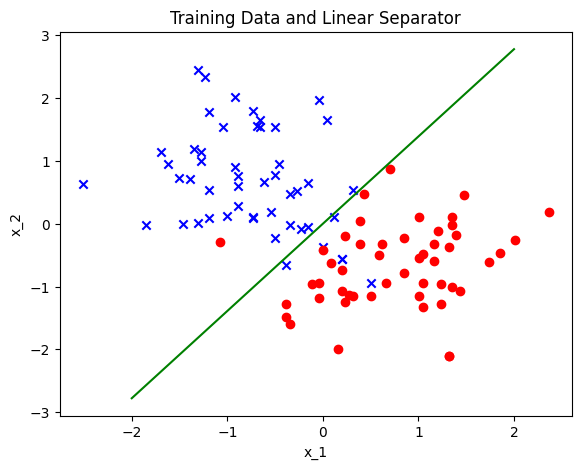

In [72]:
# Declaring the plot figures
# When covariance matrix is same for both classes
same_scatter_plt = plt.figure()
same_scatter_plt_axes = same_scatter_plt.add_axes([0.1, 0.1, 0.8, 0.8])
same_scatter_plt_axes.set_xlabel('x_1')
same_scatter_plt_axes.set_ylabel('x_2')
same_scatter_plt_axes.set_title('Training Data and Linear Separator')

# Draw the plots for same covariance matrix case
plt_input_data(training_set_x, training_set_y, same_scatter_plt_axes)
slope, intercept = plt_linear_separator(s_phi, s_mu_0, s_mu_1, s_cov_mat, same_scatter_plt_axes)
# slope, intercept

PLOT FOR DIFFERENT COVARIANCE MATRICES CASE

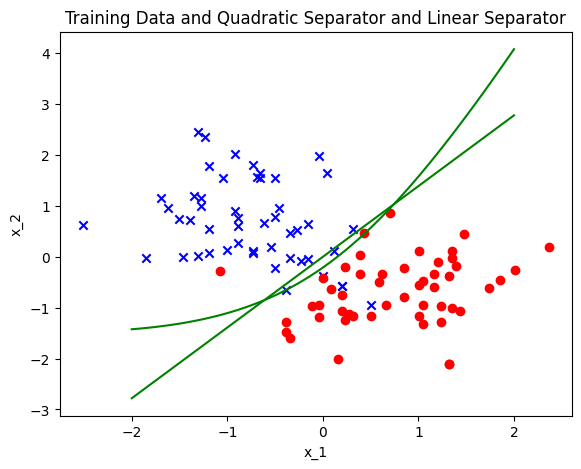

In [73]:
# When covariance matrices are different for both the classes
diff_scatter_plt = plt.figure()
diff_scatter_plt_axes = diff_scatter_plt.add_axes([0.1, 0.1, 0.8, 0.8])
diff_scatter_plt_axes.set_xlabel('x_1')
diff_scatter_plt_axes.set_ylabel('x_2')
diff_scatter_plt_axes.set_title('Training Data and Quadratic Separator and Linear Separator')

# Draw the plots for different covariance matrices case
plt_input_data(training_set_x, training_set_y, diff_scatter_plt_axes)
a, b, c, d, e, f, constant = plt_quadratic_separator(d_phi, d_mu_0, d_mu_1, d_cov_mat_0, d_cov_mat_1, diff_scatter_plt_axes)
slope, intercept = plt_linear_separator(s_phi, s_mu_0, s_mu_1, s_cov_mat, diff_scatter_plt_axes)
# a, b, c, d, e, f, constant